# Performing linecuts using the Scissors class

## Importing the `Scissors` class

In [1]:
from nxs_analysis_tools import Scissors, load_data
from nexusformat.nexus import NXdata, NXfield
import numpy as np

## Setting up a linecut - Method 1

You can set the data, linecut center, integration window, and integration axis when you initialize the `Scissors` object.

In [2]:
data = load_data('example_data/sample_name/15/example_hkli.nxs')

data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


In [3]:
scissors = Scissors(data, center=(0,0,0), window=(0.2,0.2,2), axis=None)

## Setting up a linecut - Method 2

...or you can set them one by one after initializing the object.

In [4]:
scissors = Scissors()

In [5]:
scissors.set_data(data)

In [6]:
scissors.set_center((0,0,0))

In [7]:
scissors.set_window((0.1,1,0.2))

## Performing a linecut

You can use `.cut_data()` to perform the cut, returning an `NXdata` object.

In [8]:
linecut = scissors.cut_data()

## Plotting a linecut

The `.integration_window` attribute stores a `tuple` of `slice` objects over which the integration was performed.

In [9]:
scissors.integration_window

(slice(np.float64(-0.1), np.float64(0.1), None),
 slice(np.float64(-1.0), np.float64(1.0), None),
 slice(np.float64(-0.2), np.float64(0.2), None))

To show where the integration was performed, use the `.highlight_integration_window()` method. Use the optional `width` and `height` parameters to zoom in on the region of interest.

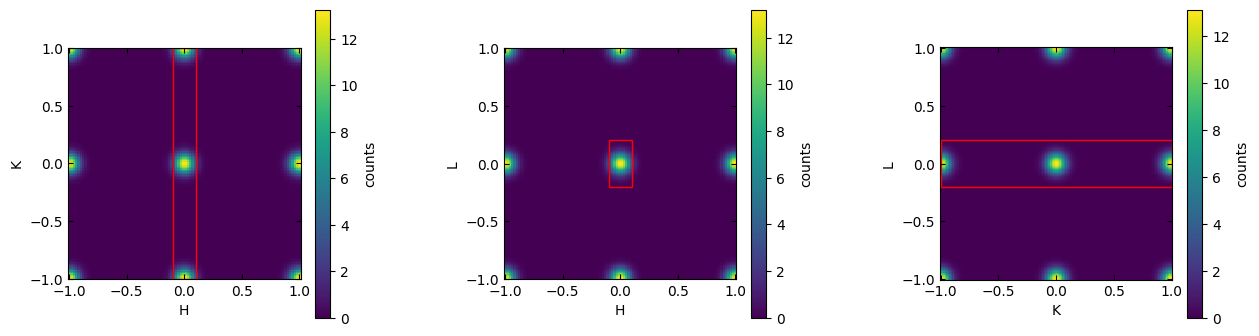

(<matplotlib.collections.QuadMesh at 0x2325005f610>,
 <matplotlib.collections.QuadMesh at 0x23250435090>)

In [22]:
scissors.highlight_integration_window()

The `label` parameter allows you to specify a label for the highlighted region.

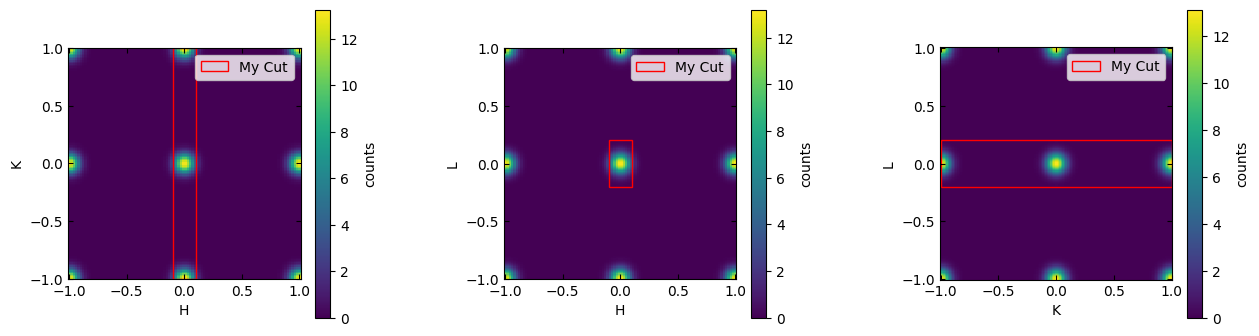

(<matplotlib.collections.QuadMesh at 0x232492e9a90>,
 <matplotlib.collections.QuadMesh at 0x2324805b4d0>)

In [11]:
scissors.highlight_integration_window(label='My Cut')

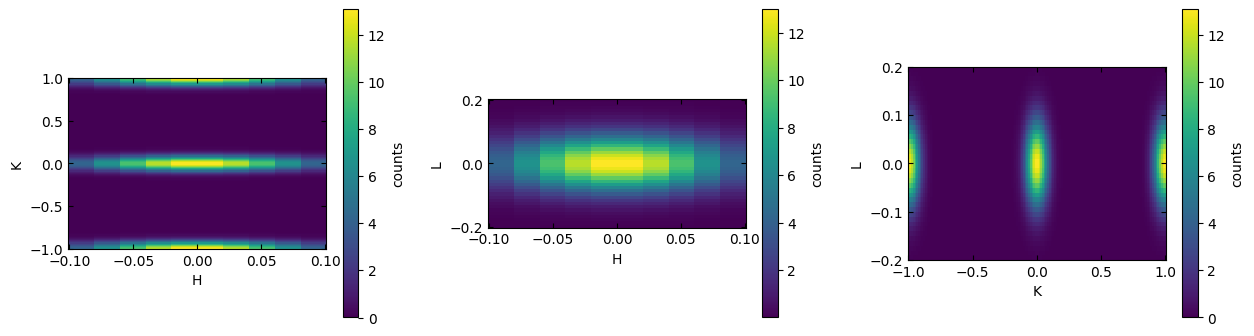

(<matplotlib.collections.QuadMesh at 0x232494f20d0>,
 <matplotlib.collections.QuadMesh at 0x23249558cd0>)

In [12]:
scissors.plot_integration_window()

The `.plot()` method of the NXdata object can be used to generate a basic plot of the linecut.

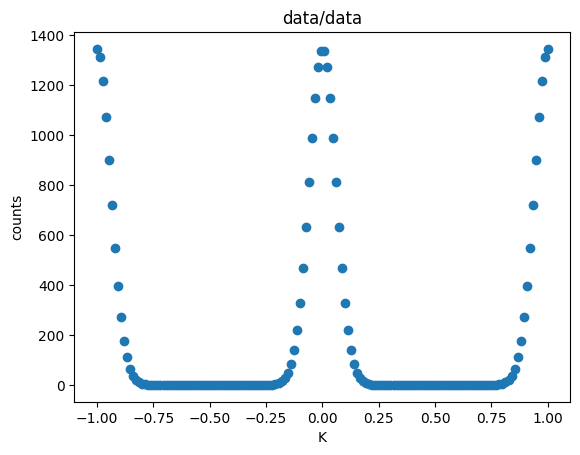

In [13]:
linecut.plot()